## Antony Sikorski - PHYS 164 - Fall 2020 
### Lab 1 Code

## 3. Plotting a FITS file to find bad pixels

Here I will write the code that plots an image of an actual FITS file so that I can find a clean area of pixels to use for my data. I will also set up some constants for later code

[[1051 1034 1043 ...  995 1001  990]
 [1085 1049 1033 ...  990  987  991]
 [1075 1050 1036 ...  996  985  989]
 ...
 [1001 1004 1025 ...  984  983  999]
 [1014 1011 1013 ...  992  991  989]
 [1018 1014 1004 ...  983  993  986]]


Text(0, 0.5, 'pixels(y)')

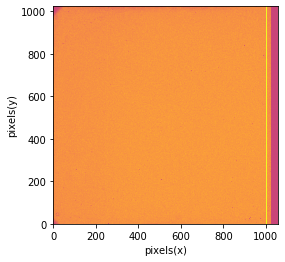

In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt

#Importing fits files of different exposures 

#This is my bias frame, which I will be subtracting from all of my other frames to increase accuracy
img_bias = 'data_2020/d1.fits'

#These are images taken with an exposure time of 3
img3_1 = 'data_2020/d5.fits'
img3_2 = 'data_2020/d6.fits'
img3_3 = 'data_2020/d7.fits'

#These are images taken with an exposure time of 6
img6_1 = 'data_2020/d8.fits'
img6_2 = 'data_2020/d9.fits'
img6_3 = 'data_2020/d15.fits'

#These are images taken with an exposure time of 12 
img12_1 = 'data_2020/d25.fits'
img12_2 = 'data_2020/d26.fits'
img12_3 = 'data_2020/d27.fits'

#These are images taken with an exposure time of 24
img24_1 = 'data_2019/d114.fits'
img24_2 = 'data_2019/d115.fits'
img24_3 = 'data_2019/d116.fits'

#These are images taken with an exposure time of 96
img96_1 = 'data_2019/d120.fits'
img96_2 = 'data_2019/d121.fits'
img96_3 = 'data_2019/d122.fits'

#These are images taken with an exposure time of 192
img192_1 = 'data_2019/d133.fits'
img192_2 = 'data_2019/d154.fits'
img192_3 = 'data_2019/d155.fits'


imgarr = [img_bias, img3_1, img3_2, img3_3, img6_1, img6_2, img6_3, img12_1, img12_2, img12_3, img24_1, img24_2, img24_3, 
          img96_1, img96_2, img96_3, img192_1, img192_2, img192_3]

#Here I choose the first fits file with a 48 second exposure time to plot so that I may see where the bad pixels are. 
sample_48 = fits.getdata(imgarr[6])
print(sample_48)

%matplotlib inline

plt.imshow(sample_48,origin='lower',interpolation='nearest',cmap='plasma', vmin = 0, vmax = 2000)
plt.xlabel('pixels(x)')
plt.ylabel('pixels(y)')
#After plotting, I see a line of bad pixels, along with a hot pixels around (400, 250).

## 4. Plotting Histograms of FITS Files

Here I will plot histograms of all of the FITS files.

data_2020/d1.fits


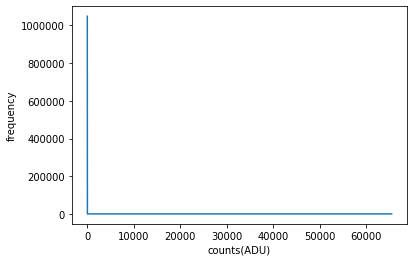

data_2020/d5.fits


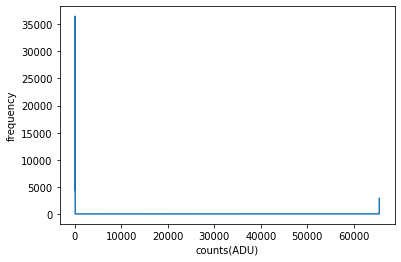

data_2020/d6.fits


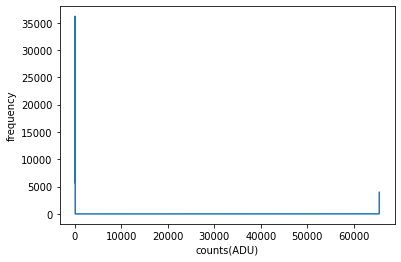

data_2020/d7.fits


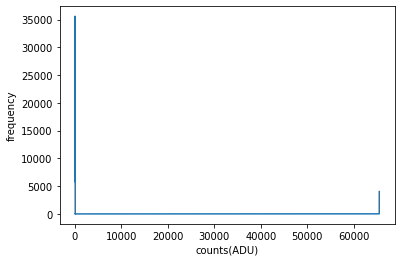

data_2020/d8.fits


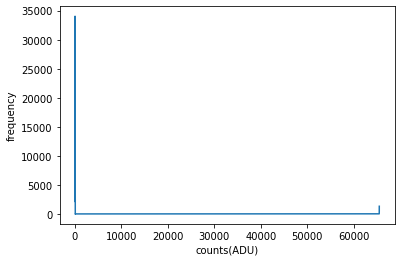

data_2020/d9.fits


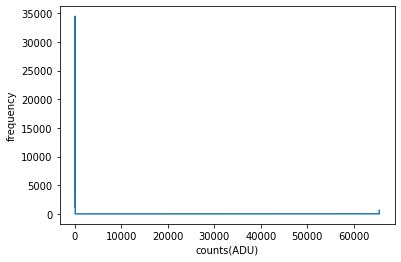

data_2020/d15.fits


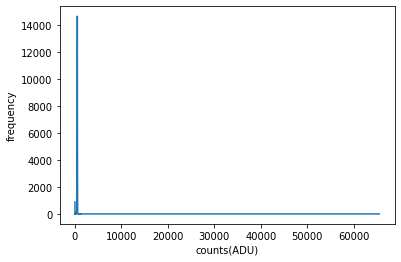

data_2020/d25.fits


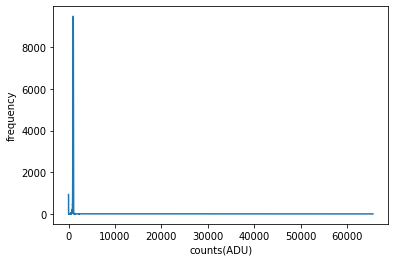

data_2020/d26.fits


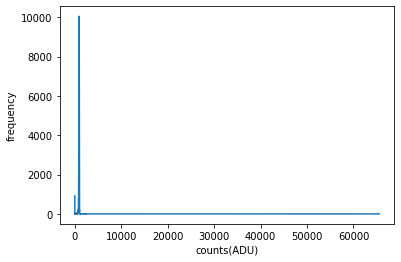

data_2020/d27.fits


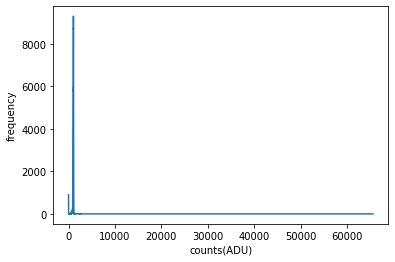

data_2019/d114.fits


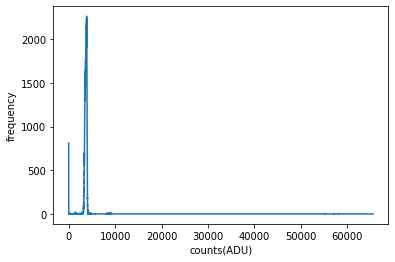

data_2019/d115.fits


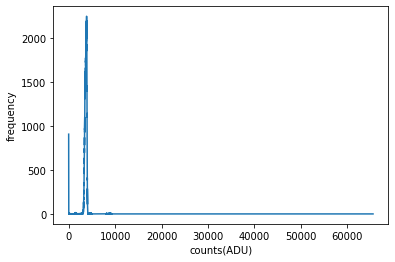

data_2019/d116.fits


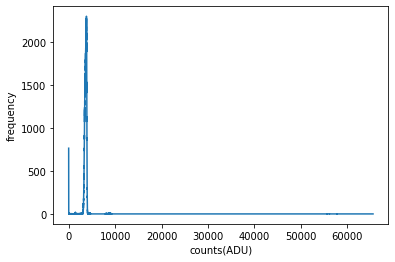

data_2019/d120.fits


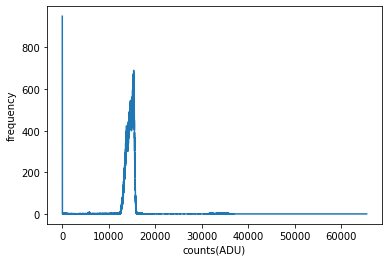

data_2019/d121.fits


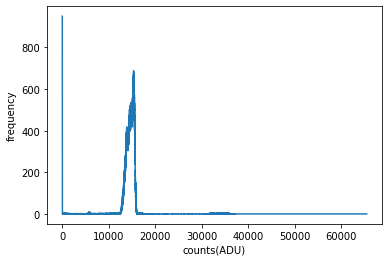

data_2019/d122.fits


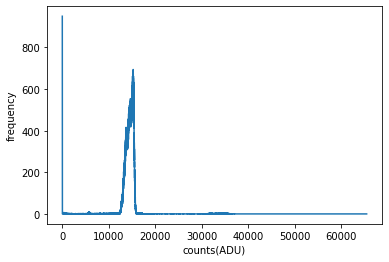

data_2019/d133.fits


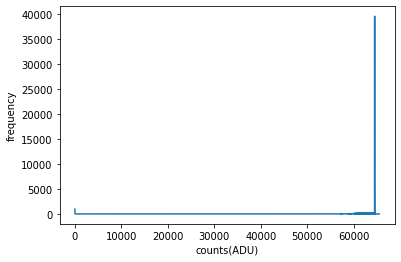

data_2019/d154.fits


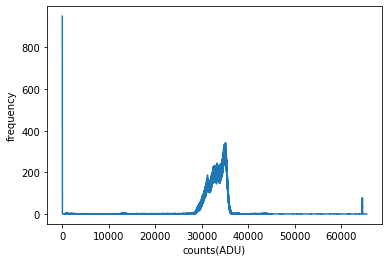

data_2019/d155.fits


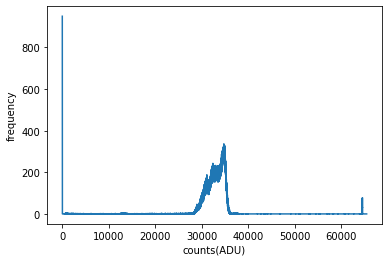

In [2]:
#Here I obtain the bias data and flatten it to be able to subtract it from all of my data
bias=np.array(fits.getdata(imgarr[0])) 
bias = bias[:,0:1024]
bias = bias.flatten()


def histo(fit):#Input fit file name, ouput histogram.
    arr=np.array(fits.getdata(fit)) #convert the fit name to usable data
    arr=arr[:,0:1024] #truncate off the overscan region
    x=arr.flatten()-bias #flatten the data and subtract the bias data
    hmin=0
    hmax=arr.max()
    hist = []
    hr=np.arange(hmin,hmax+1)
    for i in hr:
        c = len(np.where(x==i)[0])
        hist.append(c)
    plt.plot(hr,hist)
    plt.xlabel('counts(ADU)')
    plt.ylabel('frequency')
    plt.show()

    #Wrote a function to loop through all of my histograms
for i in imgarr:
    print(i)
    histo(i)

## 5. Plotting the Mean and Standard Deviation of Samples

Here I will find the mean and standard deviation of all of the FITS files and plot them against the count rate. 

This is the mean of img3_1
1077.4190877262415
This is the standard deviation of img3_1
1940.6690275205256
This is the mean of img3_2
1076.4787921311338
This is the standard deviation of img3_2
1954.8515288195908
This is the mean of img3_3
1076.1758182394085
This is the standard deviation of img3_3
1941.9638279004641
This is the mean of img6_1
1082.407562255084
This is the standard deviation of img6_1
1957.509067731295
This is the mean of img6_2
1084.1948501122954
This is the standard deviation of img6_2
1939.389250573559
This is the mean of img6_3
1544.3487909490675
This is the standard deviation of img6_3
1947.945769254166
This is the mean of img12_1
2013.2104889839745
This is the standard deviation of img12_1
1955.9323805763659
This is the mean of img12_2
1945.8187542538371
This is the standard deviation of img12_2
1953.0572327432822
This is the mean of img12_3
2045.1102405893603
This is the standard deviation of img12_3
1951.3437002182973
This is the mean of img24_1
4643.60384299579

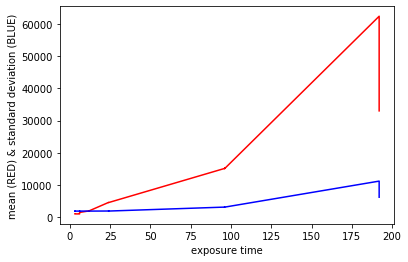

In [3]:
imgarr = [img_bias, img3_1, img3_2, img3_3, img6_1, img6_2, img6_3, img12_1, img12_2, img12_3, img24_1, img24_2, img24_3, 
          img96_1, img96_2, img96_3, img192_1, img192_2, img192_3]

#Here I define my in house mean and standard deviation functions that I will use on my data
def inhousemean(x):
    avg = 0
    for i in x:
        avg += i/len(x)
    return avg

def inhousestd(x):
    avg = inhousemean(x)
    sd = 0 
    for i in x: 
        sd += ((i - avg)**2)
    std = (sd/(len(x)))**(1/2)
    return std 

data1 = fits.getdata(imgarr[1])
data2 = fits.getdata(imgarr[2])
data3 = fits.getdata(imgarr[3])
data4 = fits.getdata(imgarr[4])
data5 = fits.getdata(imgarr[5])
data6 = fits.getdata(imgarr[6])
data7 = fits.getdata(imgarr[7])
data8 = fits.getdata(imgarr[8])
data9 = fits.getdata(imgarr[9])
data10 = fits.getdata(imgarr[10])
data11 = fits.getdata(imgarr[11])
data12 = fits.getdata(imgarr[12])
data13 = fits.getdata(imgarr[13])
data14 = fits.getdata(imgarr[14])
data15 = fits.getdata(imgarr[15])
data16 = fits.getdata(imgarr[16])
data17 = fits.getdata(imgarr[17])
data18 = fits.getdata(imgarr[18])

x1 = data1.flatten()
print("This is the mean of img3_1")
print(inhousemean(x1))
print("This is the standard deviation of img3_1")
print(inhousestd(x1))

x2 = data2.flatten()
print("This is the mean of img3_2")
print(inhousemean(x2))
print("This is the standard deviation of img3_2")
print(inhousestd(x2))

x3 = data3.flatten()
print("This is the mean of img3_3")
print(inhousemean(x3))
print("This is the standard deviation of img3_3")
print(inhousestd(x3))

x4 = data4.flatten()
print("This is the mean of img6_1")
print(inhousemean(x4))
print("This is the standard deviation of img6_1")
print(inhousestd(x4))

x5 = data5.flatten()
print("This is the mean of img6_2")
print(inhousemean(x5))
print("This is the standard deviation of img6_2")
print(inhousestd(x5))

x6 = data6.flatten()
print("This is the mean of img6_3")
print(inhousemean(x6))
print("This is the standard deviation of img6_3")
print(inhousestd(x6))

x7 = data7.flatten()
print("This is the mean of img12_1")
print(inhousemean(x7))
print("This is the standard deviation of img12_1")
print(inhousestd(x7))

x8 = data8.flatten()
print("This is the mean of img12_2")
print(inhousemean(x8))
print("This is the standard deviation of img12_2")
print(inhousestd(x8))

x9 = data9.flatten()
print("This is the mean of img12_3")
print(inhousemean(x9))
print("This is the standard deviation of img12_3")
print(inhousestd(x9))

x10 = data10.flatten()
print("This is the mean of img24_1")
print(inhousemean(x10))
print("This is the standard deviation of img24_1")
print(inhousestd(x10))

x11 = data11.flatten()
print("This is the mean of img24_2")
print(inhousemean(x11))
print("This is the standard deviation of img24_2")
print(inhousestd(x11))

x12 = data12.flatten()
print("This is the mean of img24_3")
print(inhousemean(x12))
print("This is the standard deviation of img24_3")
print(inhousestd(x12))

x13 = data13.flatten()
print("This is the mean of img96_1")
print(inhousemean(x13))
print("This is the standard deviation of img96_1")
print(inhousestd(x13))

x14 = data14.flatten()
print("This is the mean of img96_2")
print(inhousemean(x14))
print("This is the standard deviation of img96_2")
print(inhousestd(x14))

x15 = data15.flatten()
print("This is the mean of img96_3")
print(inhousemean(x15))
print("This is the standard deviation of img96_3")
print(inhousestd(x15))

x16 = data16.flatten()
print("This is the mean of img192_1")
print(inhousemean(x16))
print("This is the standard deviation of img192_1")
print(inhousestd(x16))

x17 = data17.flatten()
print("This is the mean of img192_2")
print(inhousemean(x17))
print("This is the standard deviation of img192_2")
print(inhousestd(x17))

x18 = data18.flatten()
print("This is the mean of img192_3")
print(inhousemean(x18))
print("This is the standard deviation of img192_3")
print(inhousestd(x18))




TIME = [3,3,3,6,6,6,12,12,12,24,24,24,96,96,96,192,192,192]

inhousemeans = [inhousemean(x1),inhousemean(x2),inhousemean(x3),inhousemean(x4),inhousemean(x5),inhousemean(x6),inhousemean(x7),
inhousemean(x8),inhousemean(x9),inhousemean(x10),inhousemean(x11),inhousemean(x12),inhousemean(x13),inhousemean(x14),
inhousemean(x15),inhousemean(x16),inhousemean(x17),inhousemean(x18)]

inhousestds = [inhousestd(x1),inhousestd(x2),inhousestd(x3),inhousestd(x4),inhousestd(x5),inhousestd(x6),inhousestd(x7),
inhousestd(x8),inhousestd(x9),inhousestd(x10),inhousestd(x11),inhousestd(x12),inhousestd(x13),inhousestd(x14),
inhousestd(x15),inhousestd(x16),inhousestd(x17),inhousestd(x18)]

plt.plot(TIME,inhousemeans,'r',TIME,inhousestds,'b')
plt.xlabel('exposure time')
plt.ylabel('mean (RED) & standard deviation (BLUE)')
plt.show()

From now on, I will only use 6 of the FITS files, since only one high exposure shot is needed to compare to the Poisson and Gaussian distributions, and the error analysis can be done quite easily with just 6 files. 

In [4]:
def prep(fit):#prepare and truncate data for use.
    arr=np.array(fits.getdata(fit)) #convert the fit name to usable data
    arr=arr[:,0:1024] #truncate off the overscan region
    x=arr.flatten()-bias #flatten the data and subtract the bias data
    return x

#Store the usable data in global arrays.Will only use 6 frames from now on to compare to probability distributions and 
#to estimate the error
e3 = prep('data_2020/d5.fits')
e6 = prep('data_2020/d8.fits')
e12 = prep('data_2020/d25.fits')
e24 = prep('data_2019/d114.fits')
e96 = prep('data_2019/d120.fits')
e192 = prep('data_2019/d133.fits')


## 6. Plotting the Theoretical Poisson and Gaussian Distributions

Here I will plot the theoretical Poisson and Gaussian distributions to compare them to my histograms. 

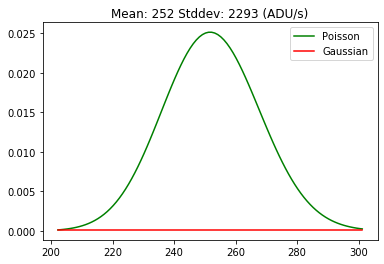

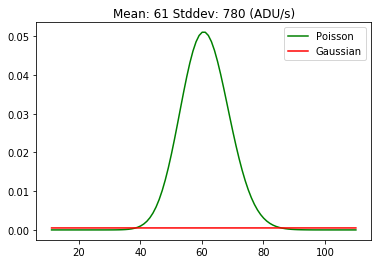

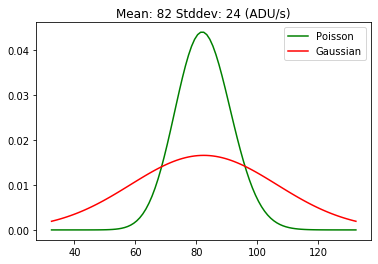

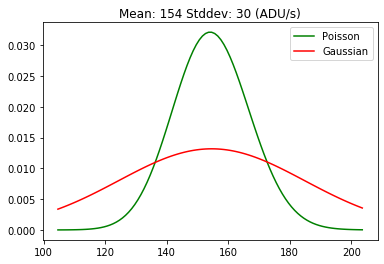

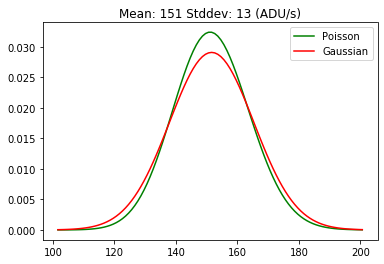

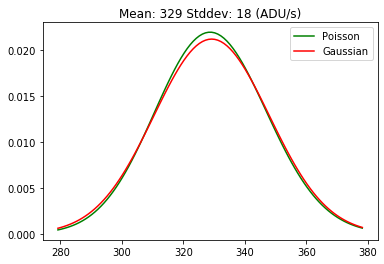

In [6]:
#Convert data to ADU/sec and get the means.
xbar = [inhousemean(e3/3),inhousemean(e6/6),inhousemean(e12/12),inhousemean(e24/24),inhousemean(e96/96),inhousemean(e192/192)]
sdevs = [inhousestd(e3/3),inhousestd(e6/6),inhousestd(e12/12),inhousestd(e24/24),inhousestd(e96/96),inhousestd(e192/192)]

np.seterr(all = 'ignore')

def dists(means,stds): #generate plots 
    for i in range(len(means)):
        plt.figure()
        m = means[i]
        s = stds[i]
        r = np.arange(m-50,m+50) #the distributions were off-center so I chose to vary r based on the mean.
        #Poisson
        pDist= 1 / np.sqrt(2 * np.pi * r) * np.power (m * np.exp(1.0) / r, r) * np.exp(-m)
        plt.plot(r, pDist, c = 'g', label = 'Poisson')
        #Gaussian
        gDist= 1 / (s * np.sqrt(2*np.pi)) * np.exp(-1/2 * np.power((r-m) / s, 2))
        plt.plot(r,gDist,c = 'r', label = 'Gaussian')
        plt.title('Mean: %i Stddev: %i (ADU/s)'%(m,s))
        plt.legend()
    
dists(xbar,sdevs) 

## 7. Finding the MOM's and STD's

Here I will find the mean of mean's and the standard deviation of means of my sets of data comprising multiple sequences so that I can examine how they vary with the number of frames. 

In [15]:
Exp3 = [inhousemean(x1),inhousemean(x2),inhousemean(x3)]
Exp6 = [inhousemean(x4),inhousemean(x5),inhousemean(x6)]
Exp12 = [inhousemean(x7),inhousemean(x8),inhousemean(x9)]
Exp24 = [inhousemean(x10),inhousemean(x11),inhousemean(x12)]
Exp96 = [inhousemean(x13),inhousemean(x14),inhousemean(x15)]
Exp192 = [inhousemean(x16),inhousemean(x17),inhousemean(x18)]

print("This is the mean of means for an exposure time of 3")
print(inhousemean(Exp3))
print("This is the standard deviation of means for an exposure time of 3")
print(inhousestd(Exp3))

print("This is the mean of means for an exposure time of 6")
print(inhousemean(Exp6))
print("This is the standard deviation of means for an exposure time of 6")
print(inhousestd(Exp6))

print("This is the mean of means for an exposure time of 12")
print(inhousemean(Exp12))
print("This is the standard deviation of means for an exposure time of 12")
print(inhousestd(Exp12))

print("This is the mean of means for an exposure time of 24")
print(inhousemean(Exp24))
print("This is the standard deviation of means for an exposure time of 24")
print(inhousestd(Exp24))

print("This is the mean of means for an exposure time of 96")
print(inhousemean(Exp96))
print("This is the standard deviation of means for an exposure time of 96")
print(inhousestd(Exp96))

print("This is the mean of means for an exposure time of 192")
print(inhousemean(Exp192))
print("This is the standard deviation of means for an exposure time of 192")
print(inhousestd(Exp192))


This is the mean of means for an exposure time of 3
1076.691232698928
This is the standard deviation of means for an exposure time of 3
0.529325357007094
This is the mean of means for an exposure time of 6
1236.9837344388156
This is the standard deviation of means for an exposure time of 6
217.34114056345288
This is the mean of means for an exposure time of 12
2001.3798279423906
This is the standard deviation of means for an exposure time of 12
41.389799227909464
This is the mean of means for an exposure time of 24
4626.394352460543
This is the standard deviation of means for an exposure time of 24
20.01118040942353
This is the mean of means for an exposure time of 96
15163.59758781696
This is the standard deviation of means for an exposure time of 96
51.155639725602114
This is the mean of means for an exposure time of 192
42875.905613032766
This is the standard deviation of means for an exposure time of 192
13770.084775019146


## 8. Measuring Camera Gain and Read Noise


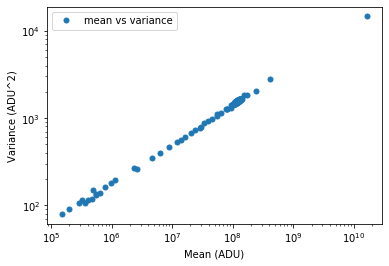

In [15]:
def pixelmean(arr): #takes the mean of pixels in the array
    N=len(arr)
    s=[]
    i=0
    while i<1024:
        a=[arr[0][i],arr[1][i],arr[2][i],arr[3][i],arr[4][i]]
        s.append(inhousemean(a))
        i+=1
    return np.array(s)

def pixelvar(arr):#takes the variance of pixels in the array.
    N=len(arr)
    s=[]
    i=0
    while i<1024:
        a=[arr[0][i],arr[1][i],arr[2][i],arr[3][i],arr[4][i]]
        s.append((inhousestd(a)*5)**2)
        i+=1
    return np.array(s)

dat=[e3,e6,e12,e24,e96,e192]
pmean=pixelmean(dat) #This is the mean of every pixel
pvar=pixelvar(dat) #This is the variance of every pixel

%matplotlib inline

# Plot original data
plt.plot(pvar,pmean, 'o', label='mean vs variance', markersize=5)
plt.ylabel('Variance (ADU^2)')
plt.xlabel('Mean (ADU)')
#Plotting in a log scale in order to more accurately view
plt.yscale('log')
plt.xscale('log')
plt.legend()

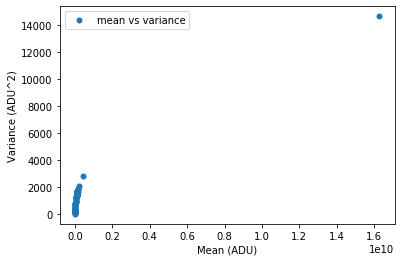

In [16]:
#Same thing as the previous code, just no log scale so the linear regression is more accurate later
def pixelmean(arr): #takes the mean of pixels in the array
    N=len(arr)
    s=[]
    i=0
    while i<1024:
        a=[arr[0][i],arr[1][i],arr[2][i],arr[3][i],arr[4][i]]
        s.append(inhousemean(a))
        i+=1
    return np.array(s)

def pixelvar(arr):#takes the variance of pixels in the array.
    N=len(arr)
    s=[]
    i=0
    while i<1024:
        a=[arr[0][i],arr[1][i],arr[2][i],arr[3][i],arr[4][i]]
        s.append((inhousestd(a)*5)**2)
        i+=1
    return np.array(s)

dat=[e3,e6,e12,e24,e96,e192]
pmean=pixelmean(dat) #This is the mean of every pixel
pvar=pixelvar(dat) #This is the variance of every pixel

%matplotlib inline

# Plot original data
plt.plot(pvar,pmean, 'o', label='mean vs variance', markersize=5)
plt.ylabel('Variance (ADU^2)')
plt.xlabel('Mean (ADU)')
plt.legend()

8.299141919010648e-07 1418.1395735807748


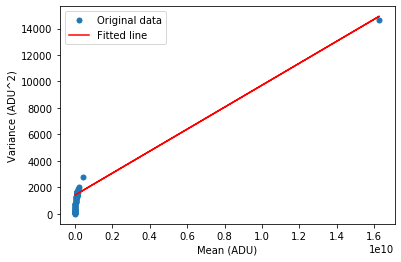

In [17]:
#This set of code finds linear fit using least squares and plots it on for comparison. 
x=pvar
y=pmean
A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m,c)

%matplotlib inline

# Plot original data
plt.plot(x, y, 'o', label='Original data', markersize=5)
# Plot fit
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.ylabel('Variance (ADU^2)')
plt.xlabel('Mean (ADU)')
plt.legend()

In [19]:
#Error of Gain
def e_gain(sy,x): #Input stddev of y axis and the x values as an array.
    N=len(x)
    d=N*np.sum(x**2)-np.sum(x)**2
    return [sy*np.sqrt(N/d),sy*np.sqrt(np.sum(x**2)/d)] #output gain and read noise error respectively
error=e_gain(inhousestd(y),x)
print('The error of the gain is ',error[0])
print('The error of the read noise is ',error[1])

The error of the gain is  2.8675480952765765e-08
The error of the read noise is  14.968803274015139
